# TA Review 2
*2/25/2025*

## FINM 37500 - 2025

### UChicago Financial Mathematics

* Burak Sekerci
* bsekerci@uchicago.edu

### Agenda
**Lecture 2 Topics**
- Swaptions
- Volatility Modeling and SABR
 <br>

## Swaptions

#### First of all what is a Swap?

A (receiving fixed) swap is simply replicated as long a fixed bond and short a floating-rate bond.

Consider the following parameters:
* swap rate $K=.05$
* maturity $T=5$
* semiannual compounding and frequency

### Arrears
Note that the swap is like the caps and floors in that the payments are based on the previous period's interest rate.

That is, the payoff at time period $i$ is
$$C_{i+1} = N\Delta_t(r_{n,i}-K)$$
where 
* $C_{i+1}$ is the cashflow at period $i+1$ 
* $r_{n,i}$ is the n-frequency compounded rate at period $i$.
* $K$ is the swap rate

#### How about a swaption?

# Swaptions

A **receiver swaption** is 
* a contract today, (with a price paid today)
* for the option, not obligation,
* to enter into a swap **receiving** the swap rate, (set today, like a strike,)
* from $T_1$ to $T_2$.

Thus, the **receiver swaption** is like a **put** on a swap.

A **payer swaption** is the same thing, but the option is to enter into the swap, **paying** the swap rate (strike). Thus, it is like the **call** on a swap.

Of course, being short the **receiver** swaption is not the same thing as being long the **payer** swaption.

Why is the receiver swaption a out on the swap?
 - Because you agree on a rate today, and you will only enter this swap if the market swap rate is lower than your agreed rate at the date that the swap starts. (T1)
 - Similarly the payer swaption is like a call since you will only enter it if the market swap rate is higher. 

### Timing

Note that we have three dates to consider: 
* the option expiration
* the swap start date
* the swap end date

A plain swaption sets the swap to start at the time the option expires.

Thus, a 2\% 1Y $\rightarrow$ 10Y denotes
* 2\% strike
* swaption with expiration of 1 year
* for a swap starting in 1 year and ending 10 years thereafter (in 11 years)

The arrows are always additive. 

## Midcurve Swaptions

Suppose that the date of (underlying) swap beginning is **after** the swaption expires. 

This is a **midcurve** swaption.

Could have a 6m $\rightarrow$ 1Y $\rightarrow$ 5Y midcurve swaption:
* expires in 6 months
* underlying swap starts one year after that expiration (in 1.5 years from today)
* swap runs for 5 years, (until 6.5 years from today.)

#### How to value Swaptions?

We will use Black's formula as usual. There are a few things to consider:

Timing: 
- Expiration of the swaption is the date plugged into Black's formula
    
    * The swaption expires at $T_o$ and that is also when the uncertainty is resolved. So use this value in Black's formula.
    * Recall that for caplets, we had to use a period before the payment due to the timing where the caplet's uncertainty is resolved a period early.

Discount Factor:
- You only need to use Black's formula once to price the swaption.
    * With caps, we had to use Black's formula repeatedly to price each caplet. (Each caplet has different expiration and forward vol.)
    * A swaption is a single option, but it involves (if exercised) multiple payments. 
    * Unlike the cap, each payoff of the exercised swaption corresponds to the same option, and thus is priced identically in Black's formula.
    * The only adjustment is to discount the exercised payoffs appropriately, refleting that they have different maturities.
    
We can use Black's formula once and scale it by the sum of appropriate discount factors to reflect multiple payoffs.
    
$$Z^{\text{swap}}(0,T_o,T) \equiv \sum_{i=1}^mZ(0,T_i)$$
where $T_i$ for $1\le i \le m$ denotes the swap payment dates.

#### Example
For the 1Y $\rightarrow$ 2Y swaption written on an (annually paying) swap we have
* $T_o=1$ 
* $T=3$ 

$$Z^{\text{swap}}(0,T_o,T) = Z(0,2) + Z(0,3)$$

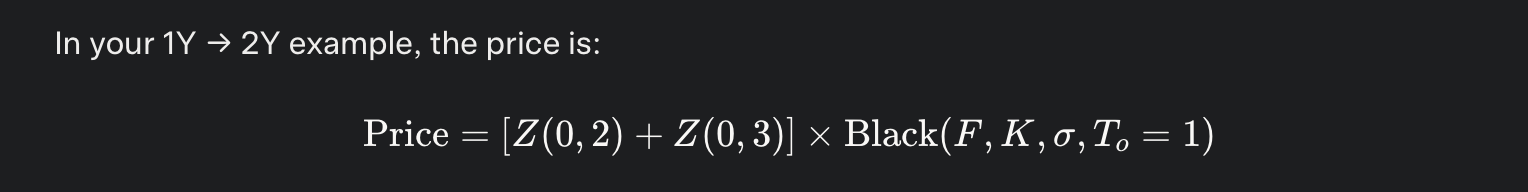

So the black's formula will handle the optionality however you do need to use the discounting factors from the duration of the swap in order to scale the optionality correctly given the swap runs for multiple cash flows and multiple years. You cannot just use Z(0,T0) because that wouldn't reflect the casflows of the swap itself.  

In order to price the swaption using Black's formula we can't use the underlying swap rate rather we need to use the appropriate forward swap rate. 


![Screenshot 2025-02-23 at 11.50.38 AM.png](<attachment:Screenshot 2025-02-23 at 11.50.38 AM.png>)
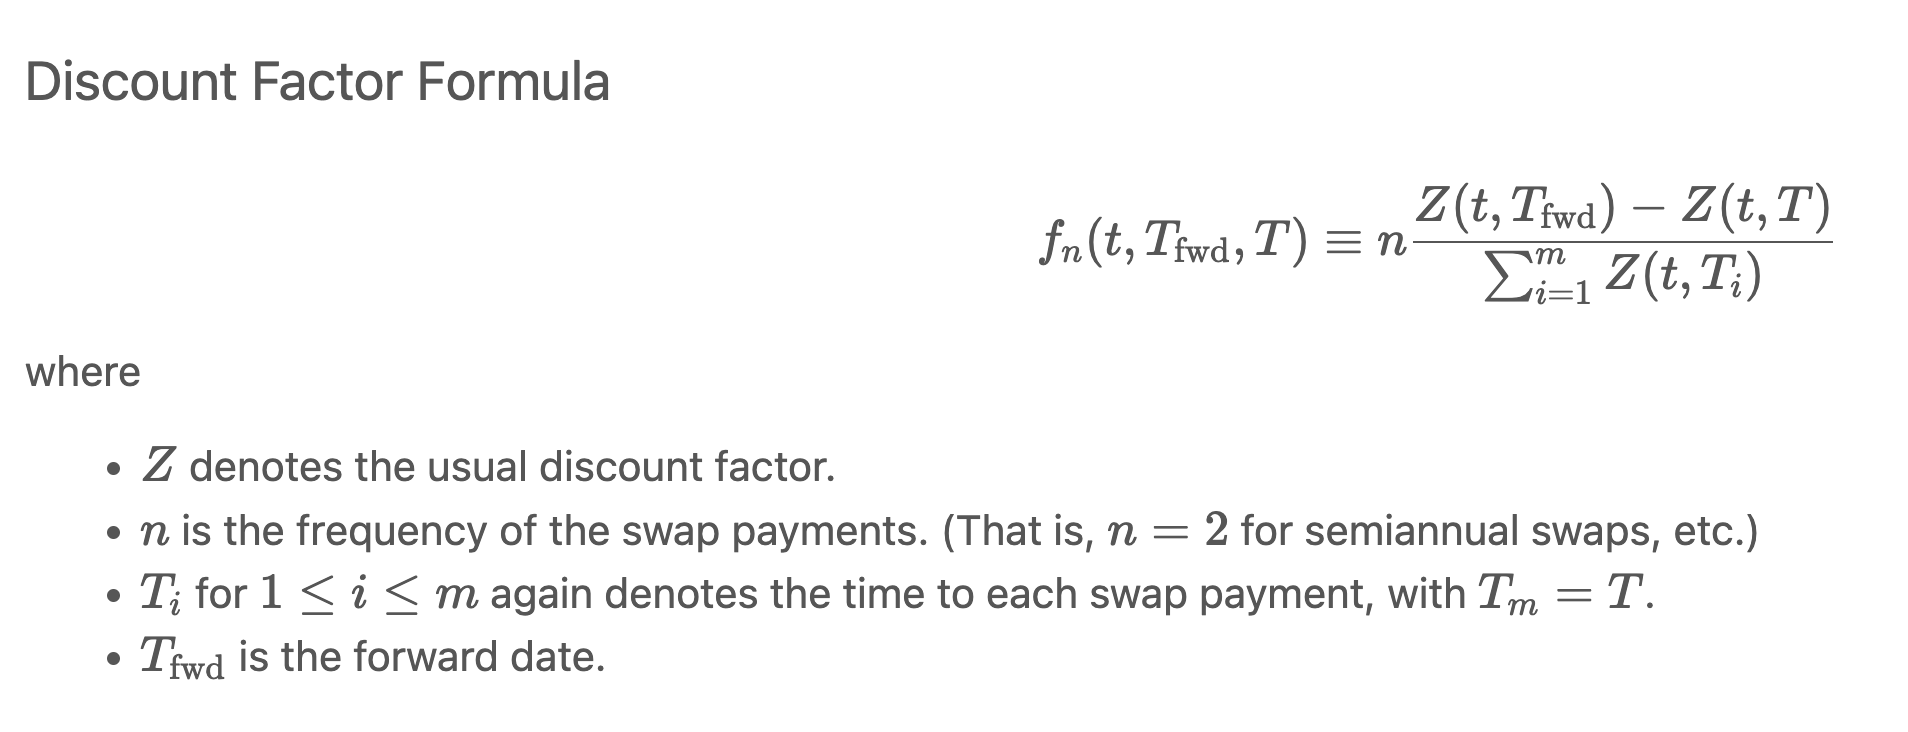

In plain english: 
 - T is the end date of the swap
 - Tfwd is the expiry of the swaption
 - t is today
 - Tm is T which is the end date of the swap again|

## Volatility Modeling and SABR

### Why do we need volatility modeling? 

- Because implied volatility is not constant for an underlying
- It changes drastically between different strikes and accross different maturities
- Thats why we need to move away from the constant vol assumption of Black Scholes
- If we can model volatility better we can delta hedge better using the delta and gamma of options

Parametric Models impose a fixed statistical structure on volatility, making them interpretable and less prone to overfitting. However, their rigid assumptions may fail to capture complex market dynamics.

-  Examples: GARCH models for time-series volatility, and the Black-Scholes model (which assumes constant volatility).

Non-Parametric Models let the data determine volatility behavior without assuming a predefined structure. While highly flexible, they are often sensitive to noise and may overfit, making them less reliable across different market conditions.

- Example: Machine learning models trained on historical volatility data.

Stochastic Models lie between these two approaches. They define a dynamic process for volatility rather than assuming it is fixed (parametric) or purely data-driven (non-parametric). Stochastic models ensure arbitrage-free pricing by adhering to financial theory while still incorporating real-world calibration. Compared to parametric models, they introduce randomness into volatility, making them better suited for capturing market phenomena like volatility clustering and mean reversion. Compared to non-parametric models, they provide more structure, ensuring consistency and avoiding excessive reliance on historical patterns that may not generalize.

-  Examples: The SABR model, widely used for derivatives pricing.

### SABR

- The SABR model is widely used in finance to describe the evolution of forward rates and implied volatility surfaces.
- It extends the standard Black-Scholes model by incorporating a stochastic volatility process.

- The SABR model dynamics are given by:


![Screenshot 2025-02-23 at 12.17.18 PM.png](<attachment:Screenshot 2025-02-23 at 12.17.18 PM.png>)
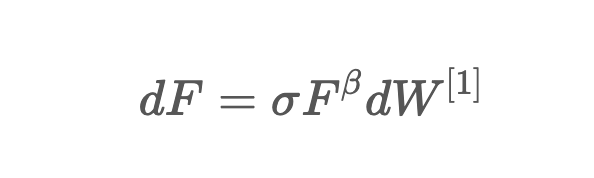

![Screenshot 2025-02-23 at 12.17.35 PM.png](<attachment:Screenshot 2025-02-23 at 12.17.35 PM.png>)
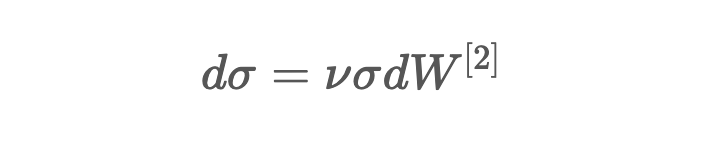

We are essentially trying to fit two stochastic processes. One describes the forward rate and the other describes its volatility. 
Here:
- F is the forward rate. 
- Sigma is the stochastic volatility. 
- dW1 and dW2 are standard Brownian motions that are correlated. 

The name of the model SABR (Stochastic Alpha Beta Rho) specifies the parameters that control this model. 

![Screenshot 2025-02-23 at 12.27.03 PM.png](<attachment:Screenshot 2025-02-23 at 12.27.03 PM.png>)
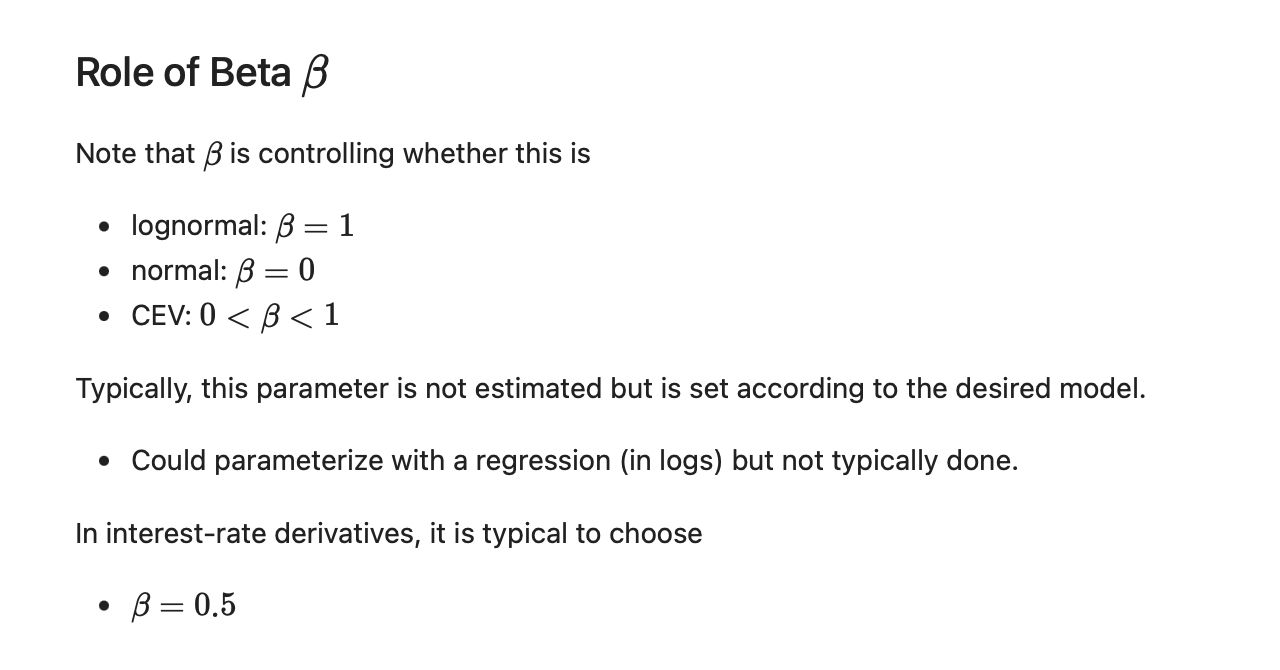

![Screenshot 2025-02-23 at 12.28.06 PM.png](<attachment:Screenshot 2025-02-23 at 12.28.06 PM.png>)
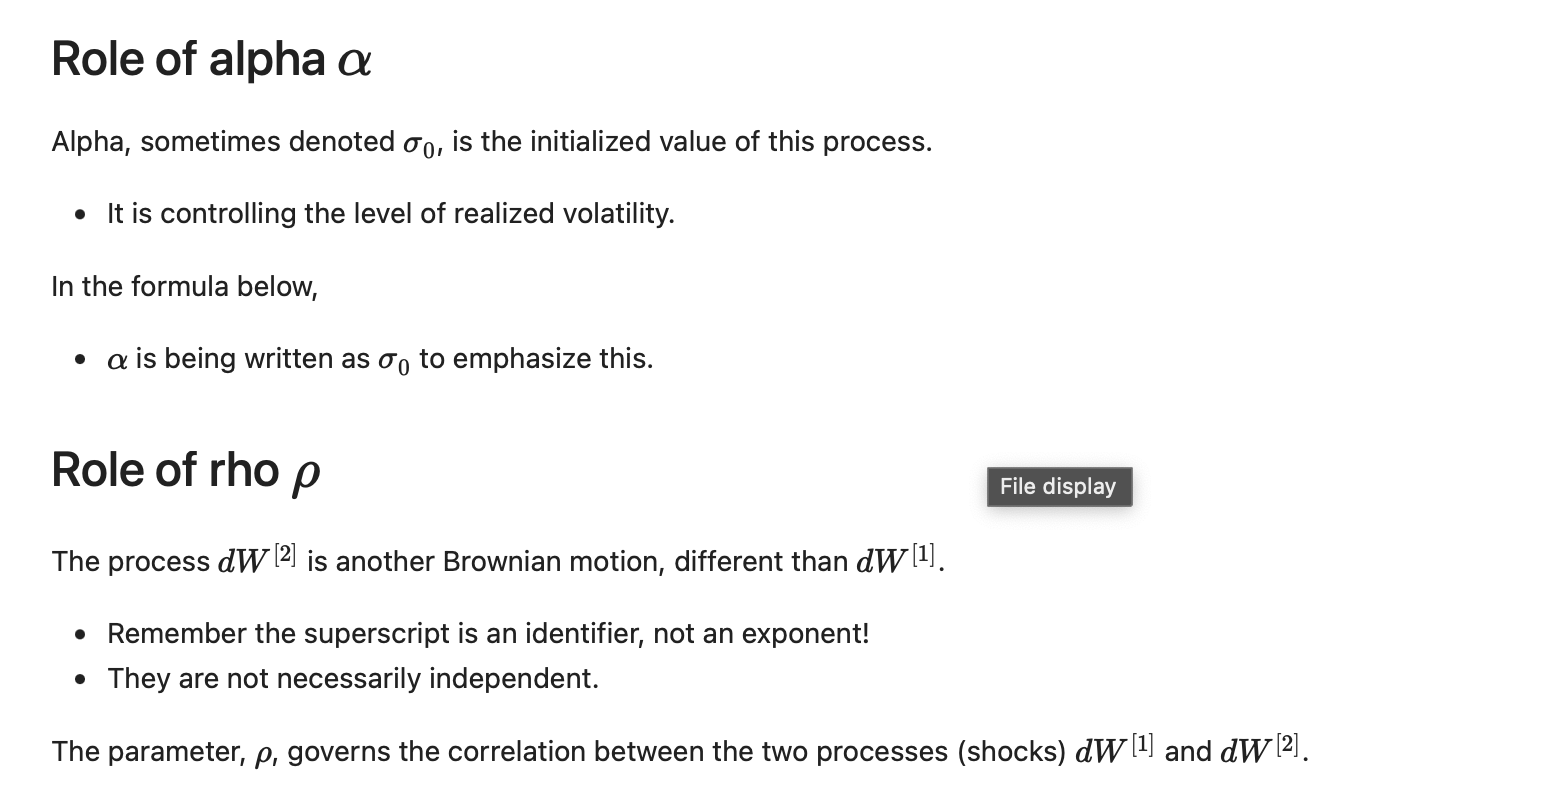

![Screenshot 2025-02-23 at 12.28.23 PM.png](<attachment:Screenshot 2025-02-23 at 12.28.23 PM.png>)
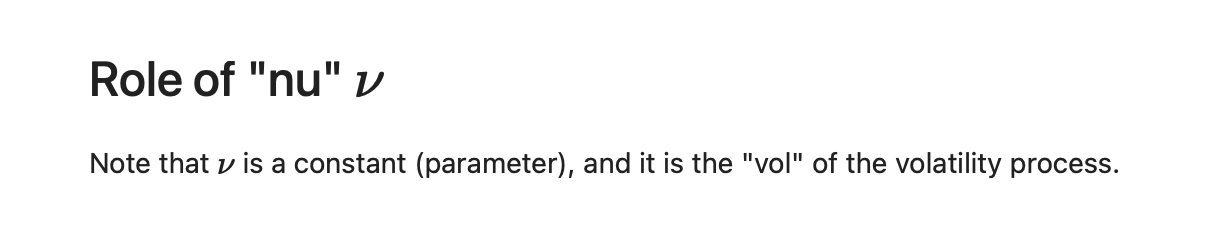

SABR doesn't have a closed form solution however by looking at at-the-money options you can find a semi closed form approximation. Looking at the ATM options sigma0 (alpha):

![Screenshot 2025-02-23 at 12.34.47 PM.png](<attachment:Screenshot 2025-02-23 at 12.34.47 PM.png>)
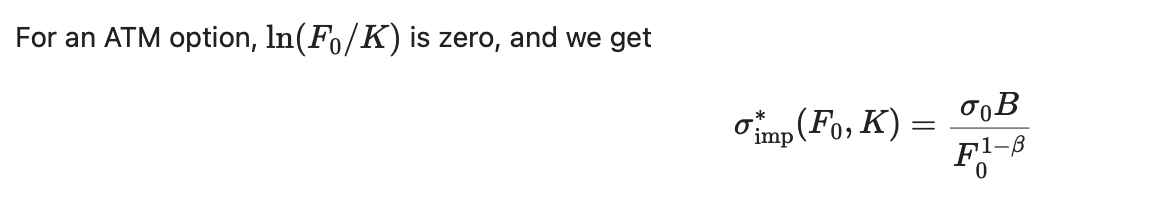

That reduces the problem to only two paramters to optimize. And because it is a semi-closed form solution it reduces the optimization time for this model. This has practical implications in the sense that the traders can recompute these models every day / hour/ second and gain an advantage. It allows for the frequent recalculation of the entire curve. 

### How to fit SABR?


## **Step 1: Collect Market Data**
Gather market-implied volatilities for **different strikes and maturities** for a given forward rate \(F\).  
- Market instruments: **Swaptions, Caps/Floors, Interest Rate Options, Equity Index Options, etc.**  
- Typically, you have a set of observed **implied volatilities** \( \sigma_{\text{imp}}(K) \) for different **strike prices** \( K \).

---

## **Step 2: Set a Value for ($B$) (Fix or Choose a Reasonable Assumption)**
- The **($B$)** parameter controls how volatility scales with the forward rate ($F$).
- **Common choices**:
  - ($B$ = 0): Normal model (absolute volatility is independent of forward rate).
  - ($B$ = 0.5): Mixed behavior (often used for interest rates).
  - ($B$ = 1): Lognormal model (volatility scales proportionally with forward rate).
- Many traders **fix \($B$) at 0.5** (a common heuristic) and only optimize the remaining three parameters.

---

## **Step 3: Estimate ($a$) (Initial Volatility) from ATM Volatility**
- If ATM implied volatility $\sigma_{\text{ATM}}$ is given, use the ATM implied vol formula.
- This provides a **quick estimate** for $a$ without needing numerical optimization.

---

## **Step 4: Calibrate ($\rho$) and ($\nu$) Using Market Volatility Smile**
- With ($B$) fixed and ($a$) estimated, we now **optimize** the remaining two parameters:  
  - **($\rho$) (correlation between volatility and forward rate)**: Determines **skew** (whether volatility increases for higher or lower strikes).
  - **($\nu$) (volatility of volatility)**: Controls **curvature** (steepness of the volatility smile).
- A simple **least-squares optimization** can be used:
  $$
  min_{\rho, \nu} \sum_{K} \left[ \sigma_{\text{SABR}}(K) - \sigma_{\text{market}}(K) \right]^2
  $$
  where $\sigma_{\text{SABR}}(K)$ is the model-implied volatility and $\sigma_{\text{market}}(K)$ is observed market volatility.

---

## **Step 5: Fine-Tune $a$ If Needed**
- Once $\rho$ and $\nu$ are found, revisit $a$ for small adjustments.
- Since $a$ scales the entire volatility surface, it may need a slight recalibration.

---

## **Step 6: Validate and Apply**
- **Check goodness of fit**: Compute error metrics (e.g., RMSE) between model-implied and market volatilities.
- **Ensure arbitrage-free conditions**: The smile should be smooth and positive (no negative probabilities).
- **Use the calibrated model for pricing**:  
  - Compute implied volatilities for any new strikes.
  - Generate **delta, gamma, vega hedging sensitivities**.

In [2]:
import pandas as pd
import numpy as np
import datetime
import warnings

import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (12,6)
plt.rcParams['font.size'] = 15
plt.rcParams['legend.fontsize'] = 13

from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)

import sys
sys.path.insert(0,'../cmds')
from options import *
from volskew import *

#from numpy import poly1d
from scipy.optimize import fsolve
from scipy.optimize import minimize

from pandas.tseries.offsets import Day, BDay
from datetime import date

In [3]:
TAG = '2025-01-31'
DATE_t = '2025-01-24'
CONTRACT = 'M2025'
LOADFILE = f'../data/vol_surfaces_{TAG}_{CONTRACT}.xlsx'
idSHEET = -1

ISCALL = False
BETA = .5
SHIFTSIZE = .5
doSLIM = False

ticksRates = ['ED','FF']

In [4]:
info = pd.read_excel(LOADFILE,sheet_name='descriptions').set_index('specs')

labels = info.columns
sheet = labels[idSHEET]

tick = info.loc['futures ticker',sheet]
name = info.loc['name',sheet]

ts, ivol_mkt = load_vol_surface(LOADFILE,sheet,ISCALL)

if tick in ticksRates:
    ts['Future Price'] = 100-ts['Future Price']
    ISCALL = 1-ISCALL

strikes = get_strikes_from_vol_moneyness(ISCALL,ivol_mkt,ts)

In [5]:
t = DATE_t
if 'C50dvol' in ivol_mkt.columns:
    colATM = 'C50dvol'
else:
    colATM = 'P50dvol'

volATM = ivol_mkt.loc[t,colATM]
F = ts.loc[t,'Future Price']
strike_grid = strikes.loc[t]
T = ts.loc[t,'Expiration Option']

ivol_obs = ivol_mkt.loc[t]


#### Optimization part ####

In [6]:
def obj_fun(xargs):
    nu = xargs[0]
    rho = xargs[1]
    alpha = xargs[2]
    ivol_mod = np.zeros(len(strike_grid))
    
    for i,K in enumerate(strike_grid):
         ivol_mod[i] = sabr(BETA,nu,rho,alpha,F,K,T)
    
    error = ((ivol_mod - ivol_obs)**2).sum()
    
    return error


def obj_fun_slim(xargs):
    nu = xargs[0]
    rho = xargs[1]
    ivol_mod = np.zeros(len(strike_grid))
    
    for i,K in enumerate(strike_grid):
         ivol_mod[i] = sabr_slim(BETA,nu,rho,F,K,T,volATM)
    
    error = ((ivol_mod - ivol_obs)**2).sum()
    
    return error

In [7]:
if not doSLIM:
    x0 = np.array([.6,0,.1])
    fun = obj_fun
else:
    fun = obj_fun_slim
    x0 = np.array([.6,0,.1])


optim = minimize(fun,x0)
xstar = optim.x
nustar = xstar[0]
rhostar = xstar[1]
   

if doSLIM:
    alphastar = solve_alpha(BETA,nustar,rhostar,T,volATM,F)
    ivolSABR = sabr_slim(BETA,nustar,rhostar,F,strike_grid,T,volATM)
else:
    alphastar = xstar[2]
    ivolSABR = sabr(BETA,nustar,rhostar,alphastar,F,strike_grid,T)

#### Detailed Function Annotations ###

In [8]:
def solve_alpha(beta, nu, rho, T, volATM, f):
    """
    Solves for the SABR parameter alpha using the at-the-money (ATM) implied volatility.

    Parameters:
    beta   : Elasticity parameter (controls dependency on strike price)
    nu     : Volatility of volatility (volvol)
    rho    : Correlation between the forward rate and volatility
    T      : Time to maturity (years)
    volATM : Market observed at-the-money (ATM) volatility
    f      : Forward rate

    Returns:
    alpha : Solved SABR volatility parameter using polynomial root-finding.
    """

    # Step 1: Construct polynomial coefficients for solving alpha
    coefs = np.ones(4)  # Initialize an array of ones for a 3rd-degree polynomial

    # Step 2: Define the polynomial coefficients
    coefs[3] = (1 - beta) ** 2 * T / (24 * f ** (2 - 2 * beta))  # Cubic term
    coefs[2] = rho * beta * nu * T / (4 * f ** (1 - beta))  # Quadratic term
    coefs[1] = 1 + (2 - 3 * rho ** 2) * nu ** 2 * T / 24  # Linear term
    coefs[0] = -volATM * f ** (1 - beta)  # Constant term (negative ATM volatility)

    # Step 3: Solve for the roots of the polynomial
    roots = poly.polyroots(coefs)  # Computes all roots of the polynomial equation

    # Step 4: Extract the real root (ignore imaginary components)
    alpha = np.real(roots[np.abs(np.imag(roots)) < 1e-6][0])  

    # Step 5: Return the computed alpha parameter
    return alpha

In [ ]:
def sabr_slim(beta, nu, rho, f, K, T, volATM):
    """
    Computes the SABR-implied volatility using a simplified version of Hagan et al.'s approximation.

    Parameters:
    beta   : Elasticity parameter (strike dependency)
    nu     : Volatility of volatility (volvol)
    rho    : Correlation between forward price and volatility
    f      : Forward rate
    K      : Strike price (array or scalar)
    T      : Time to maturity
    volATM : Market observed at-the-money (ATM) volatility

    Returns:
    SABR-implied volatility for the given parameters.
    """
    alpha = solve_alpha(beta, nu, rho, T, volATM, f)  # Solve for alpha using ATM vol

    # Compute numerator in the SABR formula
    squareNUM = (((1-beta)**2)/24) * (alpha**2)/((f*K)**(1-beta)) + (1/4) * (rho*beta*nu*alpha)/((f*K)**((1-beta)/2)) + ((2-3*rho**2)/24)*nu**2
    NUM = alpha * (1 + squareNUM * T)

    # Compute denominator in the SABR formula
    squareDEN = 1 + (((1-beta)**2)/24) * ((np.log(f/K))**2) + (((1-beta)**4)/1920) * ((np.log(f/K))**4)
    DEN = (f*K)**((1-beta)/2) * squareDEN

    # Compute SABR-implied volatility
    z = zfun(beta, nu, alpha, f, K)
    sigmaB = (NUM/DEN) * (z/chi(z, rho))

    # Handle the special case when K == F (At-the-Money)
    if isinstance(K, float) or isinstance(K, np.float64):
        if f == K:
            sigmaB = sabrATM(beta, nu, rho, alpha, f, K, T)
    else:
        mask = f == K
        sigmaB[mask] = sabrATM(beta, nu, rho, alpha, f, K[mask], T)

    return sigmaB

In [ ]:
def sabr(beta, nu, rho, alpha, f, K, T):
    """
    Computes the SABR-implied volatility using the full Hagan et al. approximation.

    Parameters:
    beta   : Elasticity parameter (determines dependency on strike price)
    nu     : Volatility of volatility (volvol)
    rho    : Correlation between forward price and volatility
    alpha  : SABR volatility parameter (must be provided, unlike in sabr_slim)
    f      : Forward rate
    K      : Strike price (array or scalar)
    T      : Time to maturity (years)

    Returns:
    SABR-implied volatility for the given parameters.
    """
    
    # Step 1: Compute numerator of the SABR formula
    squareNUM = (((1 - beta) ** 2) / 24) * (alpha ** 2) / ((f * K) ** (1 - beta)) \
                + (1 / 4) * (rho * beta * nu * alpha) / ((f * K) ** ((1 - beta) / 2)) \
                + ((2 - 3 * rho ** 2) / 24) * nu ** 2
    NUM = alpha * (1 + squareNUM * T)

    # Step 2: Compute denominator of the SABR formula
    squareDEN = 1 + (((1 - beta) ** 2) / 24) * (np.log(f / K) ** 2) \
                + (((1 - beta) ** 4) / 1920) * (np.log(f / K) ** 4)
    DEN = (f * K) ** ((1 - beta) / 2) * squareDEN

    # Step 3: Compute log-moneyness transformation
    z = zfun(beta, nu, alpha, f, K)  # Computes the scaled log-moneyness variable
    sigmaB = (NUM / DEN) * (z / chi(z, rho))  # Final SABR-implied volatility formula

    # Step 4: Handle At-The-Money (ATM) special case to avoid numerical instability
    if isinstance(K, float) or isinstance(K, np.float64):  # If K is a scalar
        if f == K:
            sigmaB = sabrATM(beta, nu, rho, alpha, f, K, T)  # Use the ATM formula
    else:
        mask = f == K  # For arrays, find the ATM elements
        sigmaB[mask] = sabrATM(beta, nu, rho, alpha, f, K[mask], T)

    # Step 5: Return the computed SABR-implied volatility
    return sigmaB

In [11]:
def sabrATM(beta, nu, rho, alpha, f, K, T):
    """
    Computes the at-the-money (ATM) implied volatility using the SABR model.
    
    Parameters:
    beta   : Elasticity parameter (determines dependency on strike price)
    nu     : Volatility of volatility (volvol)
    rho    : Correlation between the forward rate and volatility
    alpha  : SABR volatility parameter (calibrated via solve_alpha)
    f      : Forward rate (underlying)
    K      : Strike price (not used directly in this ATM version)
    T      : Time to maturity (years)

    Returns:
    sigma  : SABR-implied ATM volatility.
    """
    
    # Step 1: Compute correction factor (higher-order adjustment term)
    brack = (((1 - beta) ** 2) / 24) * ((alpha ** 2) / (f ** (2 - 2 * beta))) \
          + (rho * beta * nu * alpha) / (4 * f ** (1 - beta)) \
          + ((2 - 3 * rho ** 2) / 24) * nu ** 2

    # Step 2: Compute SABR-implied ATM volatility
    sigma = alpha * (1 + brack * T) / f ** (1 - beta)

    # Step 3: Return the computed ATM volatility
    return sigma

#### Result ###

In [12]:
error = optim.fun
param = pd.DataFrame([BETA,alphastar,nustar,rhostar,error],index=['beta ($\\beta$)','alpha ($\\alpha$)','nu ($\\nu$)','rho ($\\rho$)','fit error'],columns=['SABR Parameters']).style.format('{:.4f}')
param

,SABR Parameters
beta ($\beta$),0.5000
alpha ($\alpha$),0.6854
nu ($\nu$),0.3254
rho ($\rho$),-0.2184
fit error,0.0000


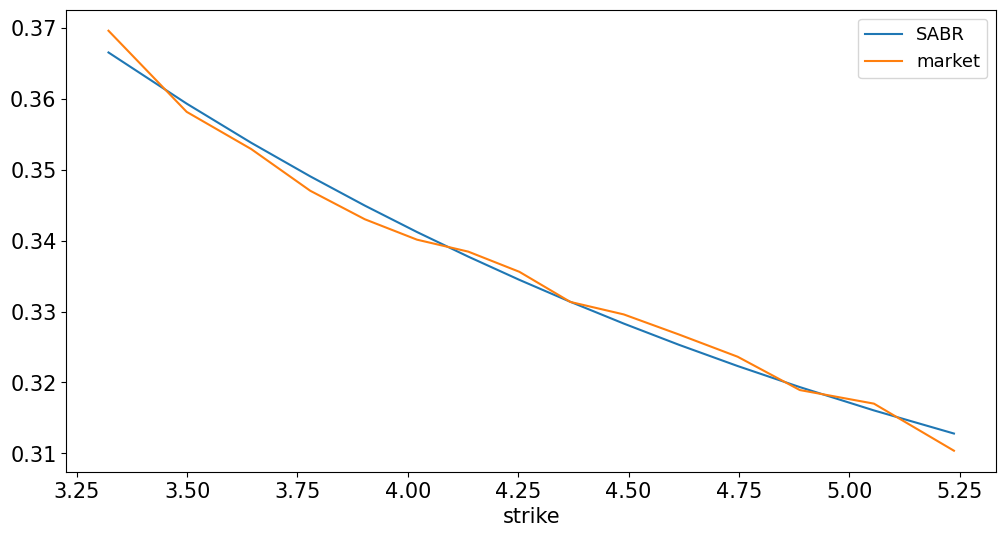

In [13]:
comp = pd.concat([ivolSABR,ivol_obs],axis=1)
comp.columns = ['SABR','market']
comp['strike'] = strike_grid
comp.set_index('strike',inplace=True)
comp.plot();